# **Supervised**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load Data
df = pd.read_csv("Dataset.csv")
df.head()

# EDA
df.shape
df.info()
df.describe()
df.isnull().sum()         # Total missing per column
df.isnull().mean()*100    # Percentage missing
df.dropna(inplace=True)  # Drop rows with any missing values
df['numerics_columns'].fillna(df['numerics_columns'].mean(), inplace=True)        # Numeric: mean
df['categorical_columns'].fillna(df['categorical_columns'].mode()[0], inplace=True)  # Categorical: mode
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.corr()

# Outlier detection
for i in df.columns:
    if df[i].dtype != 'O':
        plt.boxplot(df[i])
        plt.title(i)
        plt.show()
out_col = ['age','campaign','cons.conf.idx'] # columns with outliers

for col in out_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    LL = Q1 - IQR * 1.5
    UL = Q3 + IQR * 1.5
    df = df[(df[col] <= UL) & (df[col] >=LL)]


# Label Encoding if column is categorical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = le.fit_transform(df[i])
        print(f'Column Name : {i}')
        print("Original ---> Encoded")
        for original_class,encoded_value in zip(le.classes_,le.transform(le.classes_)):
            print(f'{original_class}->{encoded_value}')
        print()

# data split
X = df.drop('target_column', axis=1)
y = df['target_column']

### **Linear Regression**

In [ ]:
# Standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# evaluation
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# best fit line
sns.regplot(x=y_test, y=y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Best fit line for linear regression model")
plt.show()

### **Logistic Regression**

In [ ]:
# not all columns are important
# correlation
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# VIF and multicolinearilty
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.columns)]
vif_data
# drop the columns with high multicolinearity (vif >5) and check again
X.drop(['col1'], axis=1, inplace=True)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.columns)]
vif_data
# until all columns with vif > 5 are removed

# Standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# best fit line
sns.regplot(x=y_test, y=y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Best fit line for logistic regression model")
plt.show()

### **Decision Trees**

In [ ]:
# no standardisation
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# plot the model
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=X.columns)
plt.show()

# hyper-parameter tuning
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier()
param_grid = {"max_depth": [None, 5, 10, 15],
              "min_samples_split": [2, 5, 10],
              "min_samples_leaf": [1, 2, 4],
              "criterion":["gini", "entropy"],
              "random_state" : [0,42,60,100]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
final_model = DecisionTreeClassifier(**best_params)
final_model.fit(x_train, y_train)
y_pred = final_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)

# plot tree
plot_tree(final_model, fontsize = 3)

### **Random Forest**

In [ ]:
# no standardisation
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# model
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# plot model
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
plot_tree(model.estimators_[0], filled=True, feature_names=X.columns)
plt.show()

### **SVM : Support Vector Machine**

In [ ]:
# Standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model
from sklearn.svm import SVC, SVR
model = SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

### **KNN : K-Nearest Neighbours**

In [ ]:
# Standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# model
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

### **LDA : Linear Discriminant Analysis**

In [ ]:
# load data
df = pd.read_csv("dataset.scv")

# split features
X = df.drop('target_column', axis=1)
y = df['target_column']

# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

"""
Standardisation :
If we standardize before splitting, we leak information about the entire dataset, potentially leading to data leakage.
Therefore, we must standardize using only the training data so the test set remains unbiased.
"""
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# n_components
n_components = min(no. of features, no. of classes - 1)
n_components

# LDA model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=n_components)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

"""
'LDA.explained_variance_ratio_' :
How much of the class-discriminative information (variance between classes) is preserved in each Linear Discriminant (LD) component.
no.of elements shown in the printed array : LD1,LD2,etc
"""
LDA.explained_variance_ratio_

"""
sum(lda.explained_variance_ratio_) :
This tells the total class-discriminative variance explained by the selected components.
"""
sum(LDA.explained_variance_ratio_)

# ML model
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

### **Naive Bayes**

In [ ]:
# scales if gaussian naive bayes
# model
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB
model = CategoricalNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# **Unsupervised**

### **K-means Clustering**

In [ ]:
# Standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# calculate K
# elbow method :
from sklearn.cluster import KMeans
wcss = [] # WCSS (Within-Cluster Sum of Squares) measures how close points are to their cluster center
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(k_values,ssd) # Sharp "elbow" point where WCSS decrease slows
plt.title('Elbow Method - Optimal number of clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Silhouette method
from sklearn.metrics import silhouette_score
k_values = range(2,8)
silhouette_scores=[]
for k in k_values:
  km = KMeans(n_clusters=k, max_iter=150, random_state=32)
  km.fit(df_scaled)
  silhouette_scores.append(silhouette_score(df_scaled,km.labels_))
  print(f"Silhouette score for k={k}: {silhouette_scores[-1]}")

plt.subplot(1,2,2) # Peak point where silhouette score is highest
plt.plot(k_values,silhouette_scores,marker='o',color='green')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# model
kmeans = KMeans(n_clusters= k, random_state=42)
kmeans.fit(X_scaled)
y_kmeans = kmeans.predict(X_scaled)

# evaluate
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix, classification_report
silhouette_score(X_scaled, y_kmeans)
accuracy_score(y, y_kmeans)
confusion_matrix(y, y_kmeans)
print(classification_report(y, y_kmeans))
print(accuracy_score(y, y_kmeans))
print(confusion_matrix(y, y_kmeans))
print(silhouette_score(X_scaled, y_kmeans))

### **Agglomerative Clustering**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = agg_clustering.fit_predict(X)

# Plot dendrogram
# linkage matrix using scipy
linked = linkage(X, method='ward')

plt.figure(figsize=(20, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

### **PCA : Principal Component Analysis**

In [ ]:
# Standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# there is no need to do following steps if you are not plotting a visualisation, directly use pca = PCA(0.95)
x_transposed = pd.DataFrame(x_scaled).T # transposing the matrix for covariance
# Compute covariance matrix to identify correlated features and determine directions of maximum variance.
cov_matrix = np.cov(x_transposed)
pd.DataFrame(cov_matrix)

'''
Eigen Values and Eigen Vectors
- Eigen Vectors : Directiosn in which data is pread the most
- Eigen Values  : Magnitude of spread, i.e how much info or variance is captured in that direction

in pca we selct the pc eith the highest variance
'''
eig_values, eig_vectors = np.linalg.eig(cov_matrix)

# information gain
total = sum(eig_values) # i.e total variance, information gain
total

# Variance explained by each feature
variance_explained = [(i/total)*100 for i in sorted(eig_values, reverse = True)]
variance_explained

# Cumulative Explained Variance will show the total variance explained untill that feature and we generally take 95% or more so that .
cumulative_variance_explained = np.cumsum(variance_explained)
pd.DataFrame(cumulative_variance_explained)
n_components_95 = np.where(cumulative_variance_explained >= 95)[0][0] + 1
print(f"n_components_95 : {n_components_95}")

# plot
plt.figure(figsize = (10,5))
plt.bar(range(len(variance_explained)), variance_explained,label = 'Individual Explained Variance', color = 'g')
plt.step(range(len(cumulative_variance_explained)), cumulative_variance_explained,label = 'Cumulative Explained Variance', color = 'r')
plt.axhline(y=95, color='blue', linestyle='--', label='95% Variance Threshold')
plt.axvline(x=n_components_95, color='purple', linestyle='--', label=f'{n_components_95} Components explain 95%')
plt.legend()

# PCA model
from sklearn.decomposition import PCA
# pca = PCA(0.95) will give the same
pca = PCA(n_components = 40)
x_pca = pca.fit_transform(x_scaled)

# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)

# ml model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


# **Learning curve and validation curve**

### **Learning Curve**

In [ ]:
sizes, training_scores, testing_scores = learning_curve(model, X,y,cv = 10,scoring = 'accuracy', train_sizes =np.linspace(0.01,1.0,50))

mean_training = np .mean(training_scores, axis = 1)
mean_testing = np .mean(testing_scores , axis = 1)

plt.plot(sizes,mean_training ,'--', color = "b",label ="training score")
plt.plot(sizes, mean_testing, color = "g",label ="validation or testing or unseen data curve")
plt.title("learning curve")
plt.xlabel("training set size")
plt.ylabel("accuracy score")
plt.legend(loc ="best")
plt.show()


### **Validation curve**

In [ ]:
parameter_range = np.arange(1,10,1)
train_score,test_score = validation_curve(KNeighborsClassifier(), X,y,param_name="n_neighbors",param_range = parameter_range,cv = 5, scoring= "accuracy")

mean_train_score = np.mean(train_score , axis =1)
mean_test_score = np.mean(test_score, axis = 1)

plt.plot(parameter_range,mean_train_score,label ="training_score",color ='b')
plt.plot(parameter_range,mean_test_score,label ="test_score",color ='g')
plt.xlabel("number of neighbors to choose")
plt.ylabel("accuracy")
plt.legend(loc ="best")
plt.show()

# **ROC Curve and ROC_AUC score**

ROC AUC Score: 0.9044


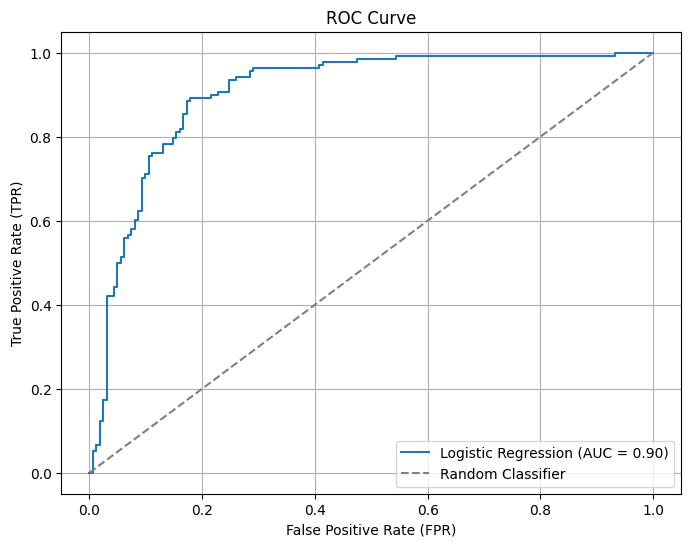

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay



X, y = make_classification(n_samples=1000, n_features=20,
                           n_informative=2, n_redundant=10,
                           random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities (not labels)
y_scores = model.predict_proba(X_test)[:, 1]  # get probabilities for class 1

# Calculate FPR, TPR
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate AUC Score
auc_score = roc_auc_score(y_test, y_scores)
print(f"ROC AUC Score: {auc_score:.4f}")

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()
